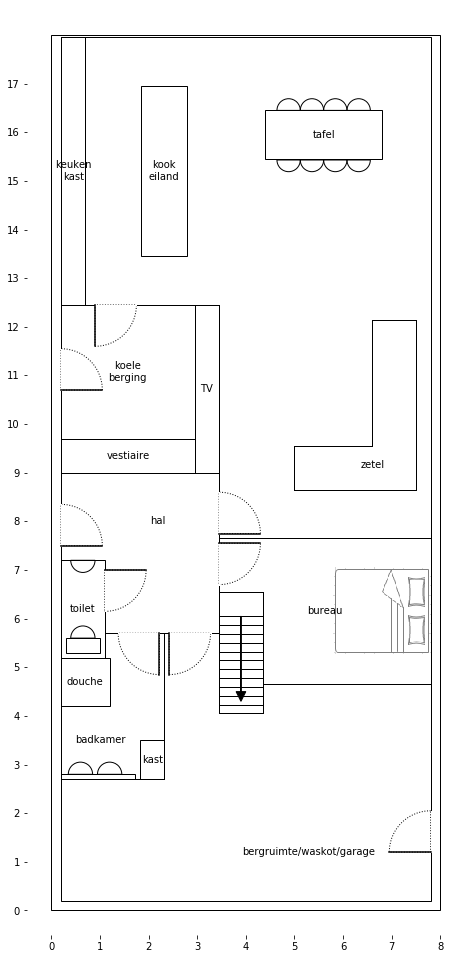

In [96]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle,Wedge
import numpy as np
import scipy.ndimage
import math

scale = 1
plt.figure(figsize=(scale*9,scale*17))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
def rectangle(x1,y1,x2,y2,text=None):
    #plt.plot([x1,x2],[y1,y2])
    #plt.plot([x1,x2],[y1,y2])
    #plt.plot([x1,x2],[y1,y2])
    ax.add_patch(Rectangle((x1,y1),x2-x1,y2-y1,fill=None))
    if text:
        ax.text(x=(x1+x2)/2,y=(y1+y2)/2,s=text,horizontalalignment="center",verticalalignment="center")
        
def text(x,y,text):
    ax.text(x=x,y=y,s=text,horizontalalignment="center",verticalalignment="center")
    
# house

def horizontalline(y,x1,x2):
    plt.plot([x1,x2],[y,y],c="black",lw=1)
    
def verticalline(x,y1,y2):
    plt.plot([x,x],[y1,y2],c="black",lw=1)
    
def line(x1,y1,x2,y2):
    plt.plot([x1,x2],[y1,y2],c="black",lw=1)

#outside walls
rectangle(0,0,8,18)

#inside walls
binnentop = 17.95
binnenbottom = 0.2
binnenleft = 0.2
binnenright = 7.8
rectangle(binnenleft,binnenbottom,binnenright,binnentop)

keukenkasttop = binnentop
keukenkastbottom = binnentop - 5.5
keukenkastleft = binnenleft
keukenkastright = binnenleft + 0.5
rectangle(keukenkastleft,keukenkastbottom,keukenkastright,keukenkasttop,"keuken\nkast")

kookeilandtop = binnentop - 1
kookeilandbottom = binnentop - 4.5
kookeilandleft = keukenkastright + 1.15
kookeilandright = kookeilandleft + 0.95
rectangle(kookeilandleft,kookeilandbottom,kookeilandright,kookeilandtop,"kook\neiland")

tafeltop = binnentop - 1.5
tafelbottom = tafeltop - 1
tafelright = binnenright - 1
tafelleft = tafelright - 2.4
rectangle(tafelleft,tafelbottom,tafelright,tafeltop,"tafel")

koelebergingtop = keukenkastbottom
koelebergingbottom = koelebergingtop - 2.75
koelebergingleft = binnenleft
koelebergingright = koelebergingleft + 2.75
rectangle(koelebergingleft,koelebergingbottom,koelebergingright,koelebergingtop,"koele\nberging")

haardmuurtjey = koelebergingtop
haardmuurtjeleft = koelebergingright
haardmuurtjeright = haardmuurtjeleft + 0.5
horizontalline(haardmuurtjey,haardmuurtjeleft,haardmuurtjeright)

zetelbottom = bureautop + 1
zetelkorttop = zetelbottom + 0.9
zetellangtop = zetelbottom + 3.50
zetelright = binnenright - 0.3
zetellangleft = zetelright - 0.9
zetelkortleft = zetelright - 2.5
verticalline(zetelkortleft,zetelbottom,zetelkorttop)
verticalline(zetellangleft,zetelkorttop,zetellangtop)
verticalline(zetelright,zetelbottom,zetellangtop)
horizontalline(zetelbottom,zetelkortleft,zetelright)
horizontalline(zetelkorttop,zetelkortleft,zetellangleft)
horizontalline(zetellangtop,zetellangleft,zetelright)

toilettop = vestiairebottom - 1.8
toiletbottom = toilettop -2
toiletleft = binnenleft
toiletright = toiletleft + 0.9
rectangle(toiletleft,toiletbottom,toiletright,toilettop,"toilet")

haardmuurtjey = vestiairebottom
haardmuurtjeleft = vestiaireright
haardmuurtjeright = haardmuurtjeleft + 0.5
horizontalline(haardmuurtjey,haardmuurtjeleft,haardmuurtjeright)


def halfcircle(x,y,r,orientation):
    if orientation == "top":
        theta1 = 0
        theta2 = 180
    elif orientation == "left":
        theta1 = 90
        theta2 = 270
    elif orientation == "right":
        theta1 = 270
        theta2 = 90
    elif orientation == "bottom":
        theta1 = 180
        theta2 = 0
    ax.add_patch(Wedge((x,y),r,theta1,theta2,fill=False))

    
def image(left,bottom,right,top,name,rotation=0,flip=False,alpha=1):
    img = plt.imread(name)
    if flip:
        img = np.flip(img,1)
    for _i in range(0,rotation):
        img = np.rot90(img)
    plt.imshow(img, extent=(left, right, top, bottom),alpha=alpha)

bedright = bureauright
bedleft = bedright-2
bedbottom = bureaubottom + 0.6
bedtop = bedbottom + 1.80
image(bedleft,bedbottom,bedright,bedtop,"bed.png",3,flip=True,alpha=0.5)
#image(zetelkortleft-0.5,zetelbottom,zetelright,zetellangtop+0.5,"sofa.jpg",0,flip=True,alpha=0.6)
nb_stoelen = 4
for x in np.linspace(tafelleft,tafelright,nb_stoelen+2)[1:-1]:
    r = (tafelright-tafelleft)/(nb_stoelen+1)/2
    halfcircle(x,tafeltop,r,"top")
    halfcircle(x,tafelbottom-0.02,r,"bottom")

def deur(x,y,degrees2,degrees1,deurwidth = 0.85):
    sin1 = math.sin(degrees1/180*math.pi)
    cos1 = math.cos(degrees1/180*math.pi)
    sin2 = math.sin(degrees2/180*math.pi)
    cos2 = math.cos(degrees2/180*math.pi)
    plt.plot([x,x+deurwidth*cos2],[y,y+deurwidth*sin2],c="white",lw=1)
    #plt.plot([x,x+deurwidth*cos2],[y,y+deurwidth*sin2],ls=":",c="k")
    plt.plot([x,x+deurwidth*cos1],[y,y+deurwidth*sin1],c="k")
    if degrees2 < degrees1:
        degrees1,degrees2 = degrees2,degrees1 
    ax.add_patch(Wedge((x,y),deurwidth,degrees1,degrees2,fill=False,ls=":"))

haardleft=koelebergingright
haardright=haardleft + 0.5
haardtop = koelebergingtop
haardbottom = vestiairebottom
rectangle(haardleft,haardbottom,haardright,haardtop,"TV")

vestiairetop = koelebergingbottom
vestiairebottom = vestiairetop - 0.7
vestiaireleft = binnenleft
vestiaireright = haardleft
rectangle(vestiaireleft,vestiairebottom,vestiaireright,vestiairetop,"vestiaire")

bureautop = binnentop - 10.3
bureaubottom = bureautop - 3
bureauhallbottom = bureautop - 1.1
bureauleft = haardright
bureauright = binnenright
#rectangle(bureauleft,bureaubottom,bureauright,bureautop,"bureau")
verticalline(haardright,haardbottom,bureaubottom)
horizontalline(bureautop,bureauleft,bureauright)
horizontalline(bureauhallbottom,bureauleft,bureauleft+0.90)
#verticalline(bureauleft+0.90,bureauhallbottom,bureaubottom)
horizontalline(bureaubottom,bureauleft+0.90,bureauright)

traptop = bureauhallbottom
trapbottom = traptop-2.5
trapright = bureauleft + 0.90
trapleft = trapright - 0.90
rectangle(trapleft,trapbottom,trapright,traptop)

n_treden = 12
for i in np.linspace(traptop-0.5,trapbottom,n_treden):
    rectangle(trapleft,traptop,trapright,i)

ax.arrow((trapright+trapleft)/2, traptop - 0.5, 0,-1.75,
         head_width=0.2, head_length=0.2, fc='k', ec='k',length_includes_head=True)
    
badkamertop = toiletbottom + 0.5
badkamerbottom = badkamertop - 3
badkamerleft = binnenleft
badkamerright = badkamerleft + 2.125
#rectangle(badkamerleft,badkamerbottom,badkamerright,badkamertop,"badkamer")
horizontalline(badkamerbottom,badkamerleft,badkamerright)
verticalline(badkamerright,badkamerbottom,badkamertop)
horizontalline(badkamertop,toiletright,badkamerright)

bergruimteleft = badkamerright
bergruimtetop = badkamertop
bergruimteright = trapleft
horizontalline(bergruimtetop,bergruimteleft,bergruimteright)

rectangle(toiletleft+0.1,toiletbottom+0.1,toiletright-0.1,toiletbottom+0.4)
halfcircle(toiletleft + (toiletright-toiletleft)/2,toiletbottom+0.4,0.25,"top")
halfcircle(toiletleft + (toiletright-toiletleft)/2,toilettop,0.25,"bottom")
#line(haardmuurtjeright,vestiairebottom,bureauleft,bureautop)
#verticalline(haardmuurtjeright,vestiairebottom,vestiairebottom-0.5)
#horizontalline(bureautop,bureauleft,bureauleft-0.5)
#line(haardmuurtjeright,vestiairebottom-0.5,bureauleft-0.5,bureautop)
#deur(bureauleft-0.5,bureautop,137,137-45)

rectangle(badkamerleft,toiletbottom-1,badkamerleft+1,toiletbottom,"douche")
#rectangle(badkamerleft,badkamerbottom,badkamerleft + 0.8,badkamerbottom + 0.5,"kast")
rectangle(badkamerright-0.5,badkamerbottom,badkamerright,badkamerbottom + 0.8,"kast")
rectangle(badkamerleft,badkamerbottom, badkamerright-0.6, badkamerbottom + 0.1)
halfcircle(badkamerleft + 0.4,badkamerbottom+0.1,0.25,"top")
halfcircle(badkamerleft + 1,badkamerbottom+0.1,0.25,"top")

deur(keukenkastright+0.2,koelebergingtop,360,360-90)
deur(binnenleft,vestiairebottom-1.5,90,0)
deur(binnenleft,koelebergingbottom+1,90,0)
deur(toiletright,toilettop-0.2,270,360)
deur(badkamerright-0.1,badkamertop,180,270)
deur(badkamerright+0.1,bergruimtetop,360,360-90)
deur(binnenright,binnenbottom+1,90,90+90)
#deur(bureauleft,bureaubottom+1,90,90-90)
deur(haardright,bureautop+0.1,90,0)
deur(bureauleft,bureautop-0.1,270,360)

text(binnenright-2.5,binnenbottom+1,"bergruimte/waskot/garage")
text(binnenleft+2,vestiairebottom-1, "hal")
text(zetellangleft,zetelkorttop-0.4, "zetel")
text(1,3.5,"badkamer")
text((bureauleft+bureauright)/2,(bureaubottom+bureautop)/2,"bureau")


#plt.xlim(-4,8+4)
#plt.yticks(range(-6,40))
#plt.ylim(-6,18+16)
plt.xlim(-0.5,8+0.5)
plt.yticks(range(0,18))
plt.ylim(-0.5,18+0.5)
plt.show()